In [7]:
import requests

In [19]:
import re

In [55]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import Select
import time
from bs4 import BeautifulSoup

driver_path = '/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/chromedriver'
driver = webdriver.Chrome(executable_path= driver_path)
driver.get("https://www.stackoverflow.com")

driver.wait = WebDriverWait(driver, 2)
driver.find_element_by_xpath('//*[@id="nav-tags"]').click()
time.sleep(2)
driver.find_element_by_xpath("(//*[@id='tagfilter'])").send_keys("scraping")
time.sleep(2)
driver.find_element_by_xpath('//*[@id="tags-browser"]/tbody/tr[1]/td[1]/a').click()
time.sleep(2)
soup_stackoverflow = BeautifulSoup(driver.page_source,"html.parser")
driver.close()



In [254]:
# NAVIGATOR DONE
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import Select
import time
from bs4 import BeautifulSoup

driver_path = '/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/chromedriver'
driver = webdriver.Chrome(executable_path= driver_path)
driver.get("https://www.edmunds.com/")

driver.wait = WebDriverWait(driver, 2)
driver.find_element_by_xpath('//*[@id="nav_research"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@href="//forums.edmunds.com/"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="TopicSearch"]/option[@value="general"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="SubtopicSearch"]/option[@value="sedans"]').click()
time.sleep(2)
driver.find_element_by_xpath('//input[@type="submit" and @value="Go!" and @name="Form_Go_Topics"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@href="https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0"]').click()
time.sleep(2)

soup_edmunds = BeautifulSoup(driver.page_source,"html.parser")
driver.close()

In [255]:
# NAME DONE
#for div in soup_edmunds.findAll('span', attrs={'class':'Author'}):
    #print((div.find('a',attrs={'class':'Username'}).text))

In [256]:
# DATE DONE
#for div in soup_edmunds.findAll('span', attrs={'class':'MItem DateCreated'}):
    #for i in div.findAll('time'):
        #if i.has_attr('title'):
            #print(i['title'])

In [257]:
# message DONE
#for div in soup_edmunds.findAll('div', attrs={'class':'Item-Body'}):
    #print((div.find('div',attrs={'class':'Message'}).text))

In [179]:
# aggregator for all the info 
z_message=[]
y_date=[]
x_name=[]
for div in soup_edmunds.findAll('div', attrs={'class':'Comment'}):
    z_message.append((div.find('div',attrs={'class':'Message'}).text))
    x_name.append(div.find('a',attrs={'class':'Username'}).text)
    for i in div.findAll('time'):
        if i.has_attr('title'):
            y_date.append(i['title'])
    

In [181]:
# gets rid of new line in message, takes a bit
z_message2=[]
for i in z_message:
    x=i.strip()
    z_message2.append(x)

In [151]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [183]:
# puts lists into data frame
data = pd.DataFrame(
    {'name': x_name,
     'date': y_date,
     'message': z_message2
    })

In [ ]:
############### do this for lots of pages! 

In [237]:
t=range(200)

In [239]:
# NAVIGATOR DONE with page progession AND list storage per page 
# FINISHED SCRAPPER
#################
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import Select
import time
from bs4 import BeautifulSoup

driver_path = '/Users/ReeceWooten/Documents/School /MSBA/Fall /Txt Analysis/chromedriver'
driver = webdriver.Chrome(executable_path= driver_path)
driver.get("https://www.edmunds.com/")

driver.wait = WebDriverWait(driver, 2)
driver.find_element_by_xpath('//*[@id="nav_research"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@href="//forums.edmunds.com/"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="TopicSearch"]/option[@value="general"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="SubtopicSearch"]/option[@value="sedans"]').click()
time.sleep(2)
driver.find_element_by_xpath('//input[@type="submit" and @value="Go!" and @name="Form_Go_Topics"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@href="https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0"]').click()
time.sleep(2)
soup_edmunds = BeautifulSoup(driver.page_source,"html.parser")
time.sleep(2)
tot_soup=[]
time.sleep(2)
tot_soup.append(soup_edmunds)
time.sleep(2)
for i in t: 
    next_button = driver.find_element_by_class_name('Next')
    next_button.click()
    time.sleep(2)
    soup_edmunds = BeautifulSoup(driver.page_source,"html.parser")
    time.sleep(2)
    tot_soup.append(soup_edmunds)
    time.sleep(2)
driver.close()





In [240]:
z_message=[]
y_date=[]
x_name=[]
for i in tot_soup:
    for div in i.findAll('div', attrs={'class':'Comment'}):
        z_message.append((div.find('div',attrs={'class':'Message'}).text))
        x_name.append(div.find('a',attrs={'class':'Username'}).text)
        for i in div.findAll('time'):
            if i.has_attr('title'):
                y_date.append(i['title'])
    # gets rid of new line in message, takes a bit
    z_message2=[]
    for i in z_message:
        x=i.strip()
        z_message2.append(x)

In [241]:
# puts lists into data frame
data = pd.DataFrame(
    {'name': x_name,
     'date': y_date,
     'message': z_message2
    })
#############
# END FINISHED SCRAPPER
#############

In [261]:
data.to_csv('HW2_data',encoding='utf-8')

In [ ]:
# aggregator for all the info 
z_message=[]
y_date=[]
x_name=[]
for div in soup_edmunds.findAll('div', attrs={'class':'Comment'}):
    z_message.append((div.find('div',attrs={'class':'Message'}).text))
    x_name.append(div.find('a',attrs={'class':'Username'}).text)
    for i in div.findAll('time'):
        if i.has_attr('title'):
            y_date.append(i['title'])
            
# gets rid of new line in message, takes a bit
z_message2=[]
for i in z_message:
    x=i.strip()
    z_message2.append(x)
    
# puts lists into data frame
data = pd.DataFrame(
    {'name': x_name,
     'date': y_date,
     'message': z_message2
    })

In [264]:
from pandas import Series, DataFrame
import pandas as pd
import nltk
import operator
import re,string
from patsy import dmatrices
%pylab inline
from nltk.corpus import stopwords
import re
from itertools import chain
from collections import Counter
import random
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
dict_car=Series(car_list.brand.values,index=car_list.model).to_dict()
dict_car

In [ ]:
car_list=pd.read_csv('/Users/ReeceWooten/Downloads/Cars make model list.csv')


In [266]:
words= data['message'].sum()

In [272]:
corpus_words = nltk.word_tokenize(words.lower())

In [274]:
corpus_words = [word for word in corpus_words if word.isalpha()==True]

In [277]:
fdist = nltk.FreqDist(corpus_words)
sorted_fdist = pd.DataFrame(sorted(fdist.items(), key=operator.itemgetter(1),reverse=True))
sorted_fdist.columns = ['word','frequency']
sorted_fdist['rank'] = sorted_fdist['frequency'].rank(method='min',ascending=False)
# take most common frequenct words and plot the graph
top_100 = sorted_fdist[:100]

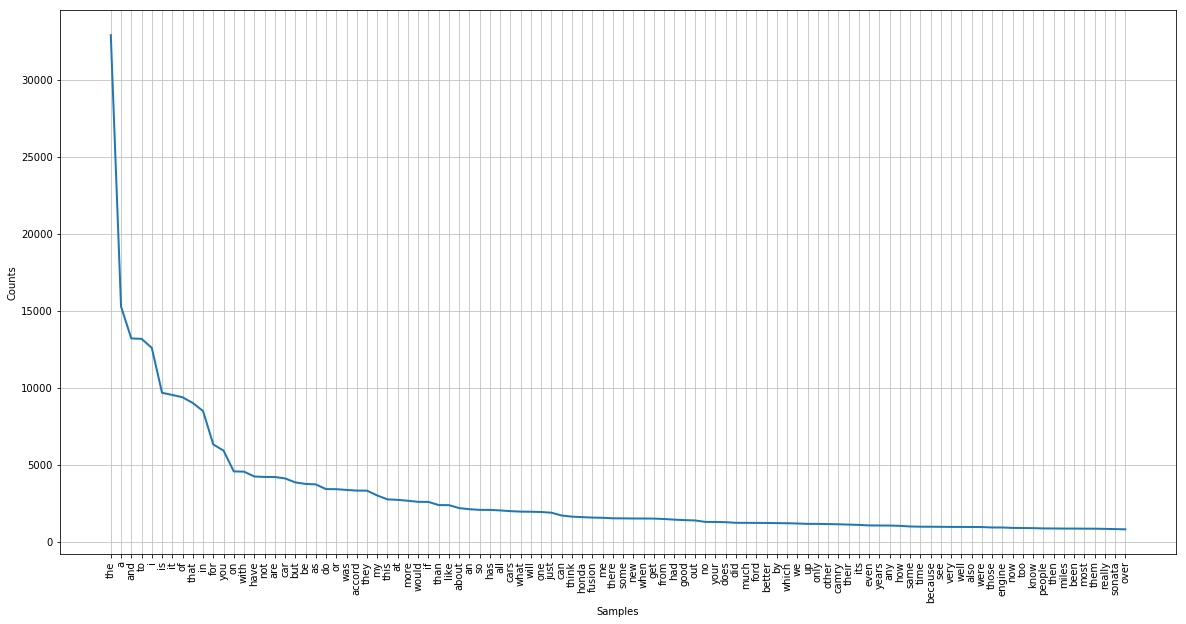

In [278]:
plt.figure(figsize=(20,10))
fdist.plot(100, cumulative=False)

In [354]:
# A3 remove stopword and lemmatize the corpus
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Removing stop words
filter_stopwords = [word for word in corpus_words if word not in stopwords.words('english')]

# Lemmatizing based on the POS
filtered_poi = nltk.pos_tag(filter_stopwords)

wnl = WordNetLemmatizer()
wordnet_tag ={'NN':'n','JJ':'a','VB':'v','RB':'r'}
words_lem = []
for t in filtered_poi:
    try: words_lem.append(wnl.lemmatize(t[0],wordnet_tag[t[1][:2]]))
    except: words_lem.append(wnl.lemmatize(t[0]))

# Getting most common words
fdist_2 = nltk.FreqDist(words_lem)
fdist_2.most_common(10)

[(u'car', 6114),
 (u'accord', 3721),
 (u'get', 2607),
 (u'would', 2599),
 (u'like', 2521),
 (u'one', 2032),
 (u'think', 1993),
 (u'good', 1849),
 (u'year', 1831),
 (u'go', 1713)]

In [372]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Removing stop words
filter_stopwords = [word for word in corpus_words if word not in stopwords.words('english')]

# Lemmatizing based on the POS
filtered_poi = nltk.pos_tag(filter_stopwords)

wnl = WordNetLemmatizer()
wordnet_tag ={'NN':'n','JJ':'a','VB':'v','RB':'r'}
words_lem = []
for t in filtered_poi:
    try: words_lem.append(wnl.lemmatize(t[0],dic_car[t[1][:2]]))
    except: words_lem.append(wnl.lemmatize(t[0]))

# Getting most common words
fdist_2 = nltk.FreqDist(words_lem)
fdist_2.most_common(10)

[(u'car', 6114),
 (u'accord', 3622),
 (u'would', 2599),
 (u'like', 2426),
 (u'one', 2032),
 (u'year', 1831),
 (u'get', 1712),
 (u'think', 1671),
 (u'fusion', 1661),
 (u'honda', 1605)]

In [385]:
# some actual work
models=[]
for i in words_lem:
    models.append(dict_car.get(i))

In [393]:
models_t=[]
for i in models:
    if i!=None:
        models_t.append(i)

In [400]:
both=models_t+words_lem
count=Counter(both)

In [415]:
final=[]
for i in both:
    for t in output:
        if i==t:
            final.append(i)

In [419]:
count_final=Counter(final)

In [420]:
for key, value in sorted(count_final.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print "%s: %s" % (key, value)

honda: 5445
toyota: 1989
ford: 1481
nissan: 1066
chevrolet: 656
saturn: 580
hyundai: 525
mazda: 513
chrysler: 441
volkswagen: 186
kia: 171
dodge: 154
bmw: 139
mercury: 124
buick: 114
subaru: 108
mitsubishi: 101
acura: 88
lincoln: 74
volkwagen: 56
audi: 50
volvo: 45
cadillac: 43
mercedes: 38
pontiac: 33
infiniti: 11
suzuki: 6


In [ ]:
Counter(c3)

In [407]:
brands=dict_car.values()

In [428]:
from nltk.tokenize import word_tokenize
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [408]:
output = []
for x in brands:
    if x not in output:
        output.append(x)
print output

['honda', 'chevrolet', 'dodge', 'hyundai', 'toyota', 'cadillac', 'pontiac', 'mazda', 'buick', 'infiniti', 'nissan', 'mercedes', 'bmw', 'acura', 'subaru', 'suzuki', 'ford', 'volvo', 'kia', 'chrysler', 'volkswagen', 'lincoln', 'volkwagen', 'mercury', 'mitsubishi', 'audi', 'saturn', 'toyata']


In [402]:
for key, value in sorted(count.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print "%s: %s" % (key, value)

car: 6114
honda: 5445
accord: 3721
get: 2607
would: 2599
like: 2521
one: 2032
think: 1993
toyota: 1989
good: 1849
year: 1831
go: 1713
well: 1709
fusion: 1660
say: 1644
look: 1601
make: 1597
new: 1550
drive: 1488
ford: 1481
see: 1307
time: 1283
much: 1234
buy: 1194
engine: 1174
camry: 1142
know: 1103
even: 1073
nissan: 1066
thing: 984
also: 965
mile: 957
use: 940
price: 911
people: 874
take: 855
sonata: 851
really: 843
sell: 832
vehicle: 827
way: 823
want: 800
model: 799
could: 796
less: 786
need: 783
still: 751
sale: 751
seem: 722
lot: 720
come: 720
many: 715
sedan: 707
cost: 670
chevrolet: 656
back: 653
pay: 651
high: 649
something: 635
power: 635
old: 612
value: 609
altima: 609
right: 608
problem: 601
may: 595
last: 583
warranty: 581
saturn: 580
great: 579
best: 577
big: 566
interior: 564
mpg: 559
find: 548
since: 536
test: 532
never: 529
point: 527
sure: 525
hyundai: 525
give: 521
mazda: 513
around: 507
dealer: 501
two: 500
number: 499
keep: 497
gm: 493
long: 492
though: 486
little:

effectively: 19
effective: 19
edmund: 19
dumb: 19
dozen: 19
discounting: 19
deffinitly: 19
damn: 19
cycle: 19
cross: 19
contender: 19
contact: 19
confidence: 19
commercial: 19
chip: 19
cargo: 19
captain: 19
busy: 19
boring: 19
billion: 19
bang: 19
yesterday: 18
wasnt: 18
voice: 18
upscale: 18
treat: 18
trannies: 18
thru: 18
tenth: 18
sun: 18
strut: 18
spending: 18
shopper: 18
setting: 18
satisfied: 18
rule: 18
rise: 18
responsive: 18
reasonably: 18
pressure: 18
peak: 18
pattern: 18
pa: 18
nature: 18
nameplate: 18
mkz: 18
michelin: 18
maxx: 18
manumatic: 18
lucerne: 18
latter: 18
importance: 18
hey: 18
hence: 18
hang: 18
german: 18
gasket: 18
ft: 18
fake: 18
exceptional: 18
evaluation: 18
et: 18
establish: 18
essentially: 18
equation: 18
ease: 18
downshift: 18
dimension: 18
decline: 18
dare: 18
competent: 18
combo: 18
code: 18
character: 18
boost: 18
awhile: 18
awesome: 18
anyways: 18
anytime: 18
adult: 18
worker: 17
warm: 17
valid: 17
upper: 17
unexpected: 17
tv: 17
trick: 17
transport

unappealing: 3
un: 3
uh: 3
uaw: 3
twinforce: 3
twenty: 3
turbine: 3
turanzas: 3
tsbs: 3
truthful: 3
trustworthy: 3
trumpet: 3
trounces: 3
troublefree: 3
trigger: 3
trickle: 3
treadwear: 3
traveled: 3
translate: 3
trailblazer: 3
tradition: 3
trademark: 3
tractor: 3
tourer: 3
tougher: 3
touched: 3
tossable: 3
tossability: 3
tongue: 3
token: 3
todays: 3
tmk: 3
tinny: 3
timer: 3
tightly: 3
tighter: 3
thursday: 3
theoretical: 3
theese: 3
thankful: 3
testimony: 3
terminal: 3
temple: 3
telescopic: 3
teh: 3
tasteful: 3
tart: 3
talked: 3
takeoff: 3
taillamp: 3
tailgate: 3
tahoe: 3
tacky: 3
swoopy: 3
swivel: 3
switchgear: 3
sweeping: 3
suspicious: 3
surgery: 3
supporter: 3
supercar: 3
superbly: 3
sunlight: 3
sugar: 3
suburbans: 3
subtle: 3
substancial: 3
subsequent: 3
subscription: 3
subpar: 3
subjectively: 3
subies: 3
stylin: 3
styled: 3
stying: 3
struck: 3
stripper: 3
string: 3
straw: 3
strap: 3
straightforward: 3
straighten: 3
stops: 3
stone: 3
stickshift: 3
steroid: 3
stark: 3
stang: 3
stand

versatile: 1
verifiable: 1
verge: 1
verdict: 1
verboten: 1
verbal: 1
veracity: 1
ventilation: 1
ventilate: 1
vengeance: 1
velvety: 1
vehicular: 1
vehiclesi: 1
vehiclesand: 1
vehiclesactually: 1
vehiclemust: 1
vehiclelength: 1
vegetable: 1
veer: 1
varys: 1
varations: 1
vaporizedstarlet: 1
vaporizedoriginal: 1
vaporizedmaybe: 1
vaporizedi: 1
vaporizedcelica: 1
vaporizedcarina: 1
vaporize: 1
vanwell: 1
vanity: 1
vandalize: 1
vancouver: 1
valvetrains: 1
valvetrain: 1
valves: 1
valueations: 1
validity: 1
validation: 1
validaidates: 1
valiant: 1
vale: 1
valance: 1
vagueness: 1
vaccum: 1
vacant: 1
uttered: 1
usefull: 1
useage: 1
usc: 1
usb: 1
usaspec: 1
usally: 1
urgently: 1
uptp: 1
uptick: 1
upthis: 1
upsmanship: 1
upslope: 1
upshift: 1
uproar: 1
upping: 1
upmost: 1
upload: 1
upholstry: 1
upholdstry: 1
uphill: 1
upgrades: 1
upgradeable: 1
updards: 1
up: 1
unwanted: 1
unviable: 1
unti: 1
unthinkable: 1
untamed: 1
unsupported: 1
unsuccessfully: 1
unstoppable: 1
unstable: 1
unscrew: 1
unscienti

getsapparently: 1
gesture: 1
geometry: 1
gentler: 1
gens: 1
geneva: 1
generically: 1
genereation: 1
generates: 1
generaly: 1
generaliztion: 1
generality: 1
geico: 1
gearshift: 1
gazillion: 1
gauntlet: 1
gathered: 1
gated: 1
gasp: 1
garrett: 1
garnered: 1
garmin: 1
garble: 1
gaps: 1
gallop: 1
gainscais: 1
gage: 1
gadgetry: 1
gaap: 1
fx: 1
fwiu: 1
futuristic: 1
fusionwell: 1
fusionsyes: 1
fusionsomeone: 1
fusions: 1
fusionmoney: 1
fusionados: 1
fusibu: 1
fury: 1
furnished: 1
furious: 1
funnier: 1
funding: 1
fundamentally: 1
fundalmentally: 1
fundalmental: 1
functional: 1
fumble: 1
fuji: 1
fuelish: 1
fudge: 1
fttaurus: 1
ftlegacy: 1
fse: 1
frustration: 1
frustrating: 1
frustrated: 1
fruns: 1
fruit: 1
froum: 1
frostbite: 1
froom: 1
frontend: 1
fritz: 1
frisbee: 1
frighteningly: 1
frictionless: 1
friction: 1
freud: 1
fret: 1
fresno: 1
freshly: 1
frender: 1
frekin: 1
freight: 1
freeways: 1
freebird: 1
freebie: 1
freakin: 1
fray: 1
fragile: 1
fractional: 1
fr: 1
fov: 1
fourty: 1
fourthly: 1
f

In [387]:
from collections import Counter

In [388]:
Counter(models)

Counter({None: 255519,
         'acura': 6,
         'audi': 3,
         'bmw': 9,
         'buick': 65,
         'cadillac': 3,
         'chevrolet': 646,
         'chrysler': 243,
         'dodge': 53,
         'ford': 206,
         'honda': 3840,
         'hyundai': 107,
         'kia': 85,
         'lincoln': 37,
         'mazda': 15,
         'mercedes': 2,
         'mercury': 102,
         'mitsubishi': 51,
         'nissan': 774,
         'pontiac': 7,
         'saturn': 440,
         'subaru': 13,
         'toyota': 1355,
         'volkswagen': 185,
         'volkwagen': 56})

In [378]:
subset = car_list[['model', 'brand']]
tuples = [tuple(x) for x in subset.values]

In [ ]:
with open('mytweets.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dict
    print(json.dumps(tweet, indent=4)) # pretty-print

In [ ]:
from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
 
# f is the file pointer to the JSON data set
for line in f: 
    tweet = json.loads(line)
    terms_only = [term for term in preprocess(tweet['text']) 
                  if term not in stop 
                  and not term.startswith(('#', '@'))]
 
    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1